# Logo Color Extraction

In [1]:
#importing requred modules
import numpy as np
from matplotlib import pyplot as plt
import cv2
from colormap import rgb2hex

In [2]:
#function for converting color space BGR -> RGB (cv2 reads image in BGR format)
def cvtColor(img):
    h,w = img.shape[0],img.shape[1]
    for i in range(h):
        for j in range(w):
            img[i][j][0],img[i][j][2] = img[i][j][2],img[i][j][0]
    return img

In [3]:
#function to load images
def load_img(name):
    img = cv2.imread(".\logos\\" + name,cv2.IMREAD_UNCHANGED)
    img = cvtColor(img)
    return img

In [4]:
#function to display image using matplotlib
def show_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [5]:
img = load_img("Himanshu Kohli.jpeg")

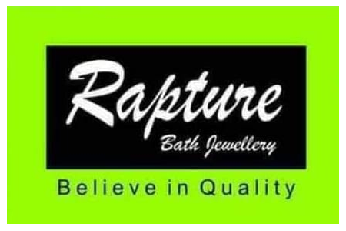

In [6]:
show_img(img)

In [7]:
img.shape

(283, 432, 3)

In [8]:
#this function find the frequency of each color and returns the color having highest frequency
def get_dominant_color(img):
    channels = img.shape[-1]
    img = img.reshape((-1,channels))
    colors = np.unique(img,return_counts=True,axis=0)
    index1 = 0
    val1 = -1
    val2 = 0
    index2 = 0
    for i in range(len(colors[1])):
        if colors[1][i] > val1:
            val2 = val1
            index2 = index1
            index1 = i
            val1 = colors[1][i]
        elif colors[1][i] > val2:
            val2 = colors[1][i]
            index2 = i    
    most_dominant = colors[0][index1]
    second_most_dominant = colors[0][index2]
    return most_dominant,second_most_dominant

In [9]:
def get_border_color(img,border_width=5):
    border = []

    h,w = img.shape[0],img.shape[1]
    border_width = 5
    channels = img.shape[2]
    
    #storing all the colors present in the image border
    #the color with heightest frequency will be the color of the border
    for j in range(0,w,border_width):
        portion = img[0:border_width,j:j+border_width]
        portion = portion.reshape((-1,channels))
        border.append(portion)

    for j in range(0,w,border_width):
        portion = img[h-border_width:h,j:j+border_width]
        portion = portion.reshape((-1,channels))
        border.append(portion)

    for i in range(border_width,h-border_width,border_width):
        portion = img[i:i+border_width,0:border_width]
        portion = portion.reshape((-1,channels))
        border.append(portion)

    for i in range(border_width,h-border_width,border_width):
        portion = img[i:i+border_width,w-border_width:w]
        portion = portion.reshape((-1,channels))
        border.append(portion)
    
    #border is initially list of lists, so converting it into a single list
    border = [item for sublist in border for item in sublist]
    border = np.array(border)
    border_color = get_dominant_color(border)[0]
    return border_color

In [10]:
border_color = get_border_color(img)

In [11]:
def print_color(color):
    channels = color.shape[-1]
    plt.imshow(np.full((100,100,channels),color))
    plt.axis('off')
    plt.title(str(rgb2hex(color[0],color[1],color[2])))
    plt.show()

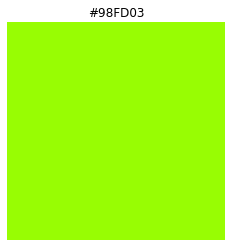

In [12]:
print_color(border_color)

In [13]:
most_dominant,second_most_dominant = get_dominant_color(img)

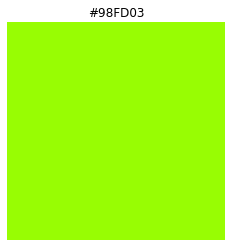

In [14]:
print_color(most_dominant)

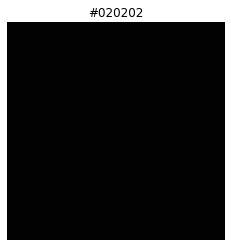

In [15]:
print_color(second_most_dominant)

In [16]:
primary_color = most_dominant

if primary_color[0]==border_color[0] and primary_color[1]==border_color[1] and primary_color[2]==border_color[2]:
    primary_color = second_most_dominant

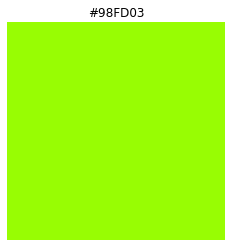

In [17]:
print_color(border_color)

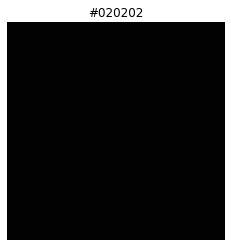

In [18]:
print_color(primary_color)

In [19]:
def get_primary_color(img,bordor_color):
    most_dominant,second_most_dominant = get_dominant_color(img)
    primary_color = most_dominant
    channels = img.shape[-1]
    #if border color and most dominant colors are same it means that boarder takes most of the space in image
    #so the primary color of the logo will be the second most dominant color
    if primary_color[0]==border_color[0] and primary_color[1]==border_color[1] and primary_color[2]==border_color[2]:
        #checking the 4th channel (in png images)
        if channels==4:
            if primary_color[3]==border_color[3]:
                primary_color = second_most_dominant
        else:
            primary_color = second_most_dominant
    return primary_color

In [20]:
from pathlib import Path

In [21]:
p = Path("./logos/")
dirs = p.glob('*')

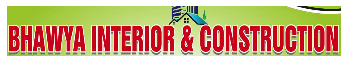

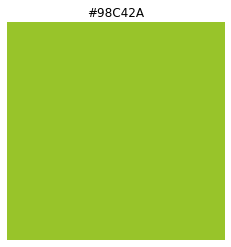

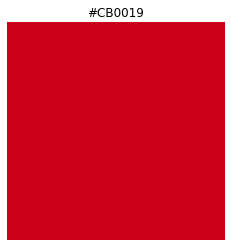

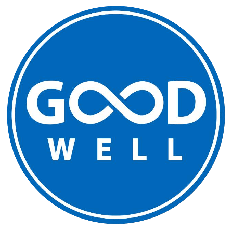

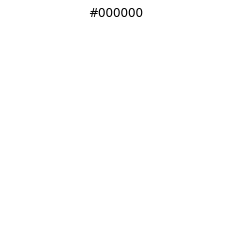

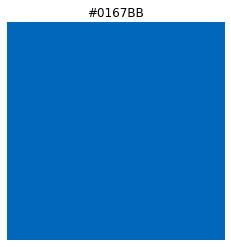

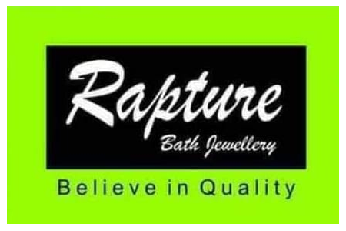

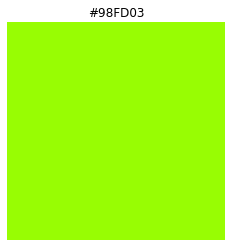

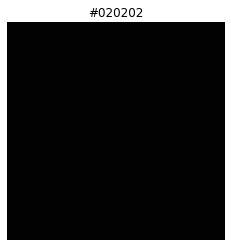

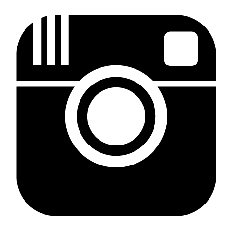

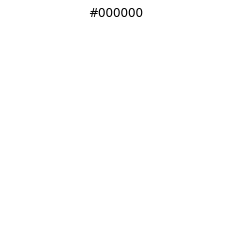

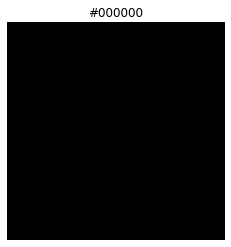

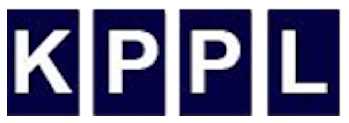

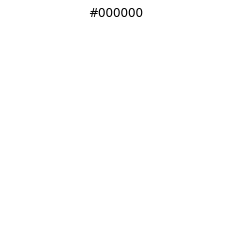

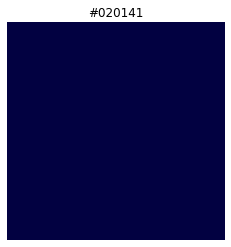

In [22]:
#testing all the images
for i in dirs:
    img_path = str(i)
    img_path = img_path.split('\\')[-1]
    img = load_img(img_path)
    show_img(img)
    border_color = get_border_color(img,1)
    primary_color = get_primary_color(img,border_color)
    print_color(border_color)
    print_color(primary_color)